# Lab 4

Brock Forsythe and Michaela Cohee

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
adults = pd.read_csv('adult.data',header=None, skipinitialspace=True,
    names = ['age', 'workclass', 'fnlwgt', 'education','education-num', 'marital-status',
            'occupation','relationship','race','sex','capital-gain','capital-loss',
            'hours-per-week','native-country','income']
)

adults

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### What are the 25th, 50th, and 75th pecentiles of the “education-num” field?

In [3]:
educ_info = adults[['education-num']]

print("The 25th percentile of the 'education_num' field is ", np.percentile(educ_info, 25))
print("The 50th percentile of the 'education_num' field is ", np.percentile(educ_info, 50))
print("The 75th percentile of the 'education_num' field is ", np.percentile(educ_info, 75))

The 25th percentile of the 'education_num' field is  9.0
The 50th percentile of the 'education_num' field is  10.0
The 75th percentile of the 'education_num' field is  12.0


In [4]:
educ_info.describe()

# this calculates the 25th, 50th, and 75th percentile of education-num easily. Now we can check our work


,education-num
count,32561.000000
mean,10.080679
std,2.572720
min,1.000000
25%,9.000000
50%,10.000000
75%,12.000000
max,16.000000


### What is the probability that an adult makes more than 50k given that their education-num is within the ranges defined by the above quantiles (from 0 to the 25th percentile, from the 25th to the 50th etc)?

In [5]:
educ_income = adults[['education-num', 'income']]
quartile_one=(educ_income[(educ_income['income'] == '>50K') & (educ_income['education-num'] >= 1) & (educ_income['education-num'] <= 9)].groupby(by='education-num').count().sum() / educ_income[(educ_income['education-num'] >= 1) & (educ_income['education-num'] <= 9)].count().sum())
quartile_two=(educ_income[(educ_income['income'] == '>50K') & (educ_income['education-num'] >= 9) & (educ_income['education-num'] <= 10)].groupby(by='education-num').count().sum() / educ_income[(educ_income['education-num'] >= 9) & (educ_income['education-num'] <= 10)].count().sum())
quartile_three=(educ_income[(educ_income['income'] == '>50K') & (educ_income['education-num'] >= 10) & (educ_income['education-num'] <= 12)].groupby(by='education-num').count().sum() / educ_income[(educ_income['education-num'] >= 10) & (educ_income['education-num'] <= 12)].count().sum())
quartile_four=(educ_income[(educ_income['income'] == '>50K') & (educ_income['education-num'] > 12) & (educ_income['education-num'] <= 16)].groupby(by='education-num').count().sum() / educ_income[(educ_income['education-num'] > 12) & (educ_income['education-num'] <= 16)].count().sum())

print("P(>50K | education-num in quartile 1) = ", quartile_one)
print("P(>50K | education-num in quartile 2) = ", quartile_two)
print("P(>50K | education-num in quartile 3) = ", quartile_three)
print("P(>50K | education-num in quartile 4) = ", quartile_four)

P(>50K | education-num in quartile 1) =  income    0.065033
dtype: float64
P(>50K | education-num in quartile 2) =  income    0.08605
dtype: float64
P(>50K | education-num in quartile 3) =  income    0.103337
dtype: float64
P(>50K | education-num in quartile 4) =  income    0.242283
dtype: float64


### Plot the change in probability that a person makes more and less than 50k given their years of education.

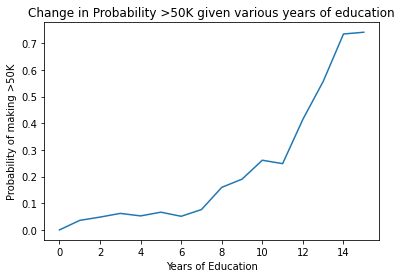

In [6]:
rich = educ_income[educ_income['income'] == '>50K']

plot_intersection = rich.groupby(by='education-num').count()

educ = educ_income.groupby(by='education-num').count()

plot_intersection = plot_intersection.reset_index()

educ = educ.reset_index()

top = [i[1]['income'] for i in plot_intersection.iterrows()]
bottom = [i[1]['income'] for i in educ.iterrows()]

top.insert(0,0)

y_values = [i / j for i,j in zip(top, bottom)]
x_values = [i for i in range(0, 16)]

plt.plot(x_values, y_values)
plt.title('Change in Probability >50K given various years of education')
plt.xlabel('Years of Education')
plt.ylabel('Probability of making >50K')
plt.show()

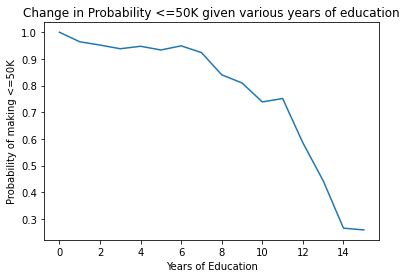

In [7]:
poor = educ_income[educ_income['income'] == '<=50K']

plot_intersection = poor.groupby(by='education-num').count()

educ = educ_income.groupby(by='education-num').count()

plot_intersection = plot_intersection.reset_index()

educ = educ.reset_index()

top = [i[1]['income'] for i in plot_intersection.iterrows()]
bottom = [i[1]['income'] for i in educ.iterrows()]

y_values = [i / j for i,j in zip(top, bottom)]
x_values = [i for i in range(0, 16)]

plt.plot(x_values, y_values)
plt.title('Change in Probability <=50K given various years of education')
plt.xlabel('Years of Education')
plt.ylabel('Probability of making <=50K')
plt.show()

### What is the covariance between the number of hours worked per week and education-num?

In [8]:
# What is the covariance between the number of hours worked per week and education-num?
sub_data = adults[['education-num', 'hours-per-week']]
matrix = sub_data.values
xvals = [i for i,j in matrix]
yvals = [j for i,j in matrix]
cov = np.cov(xvals, yvals, rowvar=False)
print(cov[0,1]) 

4.705337944611544


# Use the pandas.DataFrame.boxplot functionality to create a box-and-whisker plot which illustrates the spread of hours worked among adults who make both more and less than $50k.

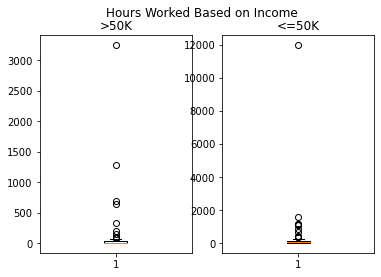

In [9]:
plot_gt = adults[['hours-per-week', 'income']]
plot_gt = plot_gt[plot_gt['income'] == '>50K']
plot_gt = plot_gt.groupby(by='hours-per-week').count()
plot_gt_list = [i[1] for i in plot_gt.reset_index().values]
plot_lt = adults[['hours-per-week', 'income']]
plot_lt = plot_lt[plot_lt['income'] == '<=50K'].groupby(by='hours-per-week').count()
plot_lt_list = [i[1] for i in plot_lt.reset_index().values]
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.suptitle('Hours Worked Based on Income')
ax1.set_title('>50K')
ax2.set_title('<=50K')

ax1.boxplot(plot_gt_list)
ax2.boxplot(plot_lt_list)
plt.rcParams['figure.figsize'] = [15, 25]

# Use the pandas.DataFrame.boxplot functionality to create a box-and-whisker plot which illustrates the spread of hours worked among adults from each native country and who make more and less than $50k.

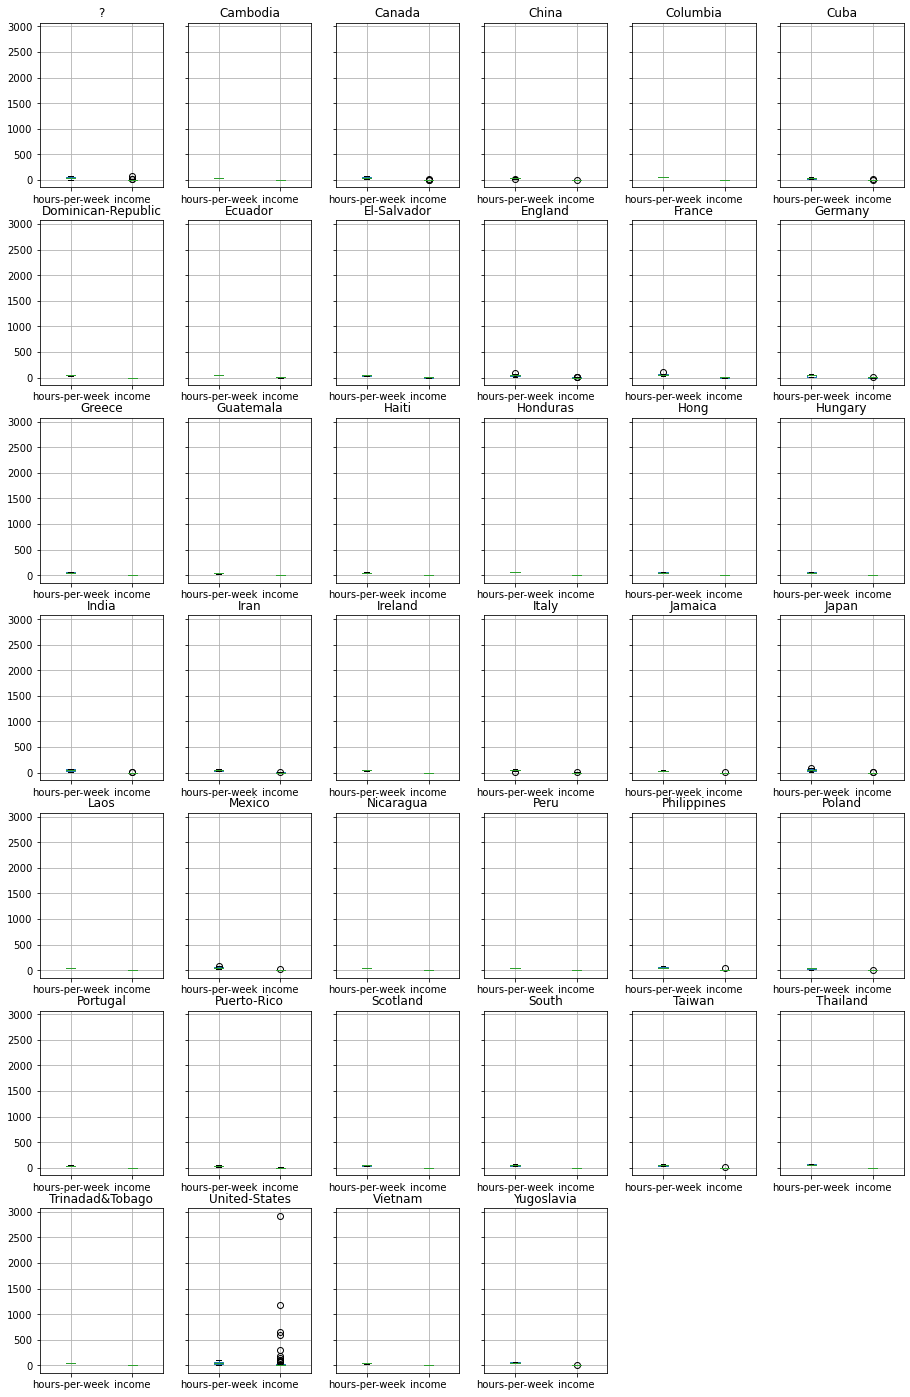

In [10]:
plot_gt = adults[['hours-per-week', 'native-country', 'income']]
plot_gt = plot_gt[plot_gt['income'] == '>50K'].groupby(by=['native-country', 'hours-per-week']).count().reset_index().groupby(by='native-country')
print(plot_gt)
plot_gt.boxplot()
plt.rcParams['figure.figsize'] = [15, 5]

# Create a table where entry (x, y) contains the conditional probability
# P(A random adult has level of education x|they have education-num y).

In [31]:
temp = adults[['education', 'education-num', 'income']]
count = temp.groupby(by=['education', 'education-num']).count().reset_index()
count_nums = temp.groupby(by=['education-num', 'education']).count().reset_index()
edu = [i[0] for i in count.groupby(by='education').count().iterrows()]
edu_nums = [i[0] for i in count_nums.groupby(by='education-num').count().iterrows()]
bottom = temp.groupby(by='education-num').count()
bottom_prob_list = [i[1]['income'] for i in bottom.iterrows()]
answers = []
for i in edu:
    for ind,j in enumerate(edu_nums):
        val = count[(count['education'] == i) & (count['education-num'] == j)]['income'].values[0] if count[(count['education'] == i) & (count['education-num'] == j)]['income'].values else 0
        val = val / bottom_prob_list[ind]
        answers.append(val)

print('\tEducation Level\t|\tNumber of Years |\tProbability of Education Level Given Number of Years)')
print('-------------------------------------------------------------------------------------------------------------')
count = 0
for i in edu:
    for j in edu_nums:
        print(f'\t\t{i}\t\t\t{j}\t\t\t\t{answers[count]}')
        count = count + 1

	Education Level	|	Number of Years |	Probability of Education Level Given Number of Years)
-------------------------------------------------------------------------------------------------------------
		10th			1				0.0
		10th			2				0.0
		10th			3				0.0
		10th			4				0.0
		10th			5				0.0
		10th			6				1.0
		10th			7				0.0
		10th			8				0.0
		10th			9				0.0
		10th			10				0.0
		10th			11				0.0
		10th			12				0.0
		10th			13				0.0
		10th			14				0.0
		10th			15				0.0
		10th			16				0.0
		11th			1				0.0
		11th			2				0.0
		11th			3				0.0
		11th			4				0.0
		11th			5				0.0
		11th			6				0.0
		11th			7				1.0
		11th			8				0.0
		11th			9				0.0
		11th			10				0.0
		11th			11				0.0
		11th			12				0.0
		11th			13				0.0
		11th			14				0.0
		11th			15				0.0
		11th			16				0.0
		12th			1				0.0
		12th			2				0.0
		12th			3				0.0
		12th			4				0.0
		12th			5				0.0
		12th			6				0.0
		12th			7				0.0
		12th			8				1.0
		12th			9				0.0
		12th			10				0.0
		12th			11				0.0
		12th			

<ipython-input-31-dd1b69ae9783>:11: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  val = count[(count['education'] == i) & (count['education-num'] == j)]['income'].values[0] if count[(count['education'] == i) & (count['education-num'] == j)]['income'].values else 0


# Create a table where entry (x, y) contains the conditional probability of having 
# marital status x given that they have occupation y.

In [47]:
temp = adults[['marital-status', 'occupation', 'income']]
marital_status = temp.groupby(by=['marital-status', 'occupation']).count().reset_index()
occupation = temp.groupby(by=['occupation', 'marital-status']).count().reset_index()
ms = [i[0] for i in marital_status.groupby(by='marital-status').count().iterrows()]
occ = [i[0] for i in occupation.groupby(by='occupation').count().iterrows()]
bottom = temp.groupby(by='occupation').count()
bottom_prob_list = [i[1]['income'] for i in bottom.iterrows()]
answers = []
for i in ms:
    for ind,j in enumerate(occ):
        val = marital_status[(marital_status['marital-status'] == i) & (marital_status['occupation'] == j)]['income'].values[0] if marital_status[(marital_status['marital-status'] == i) & (marital_status['occupation'] == j)]['income'].values else 0
        val = val / bottom_prob_list[ind]
        answers.append(val)

print('\tMarital Status \t|\tOccupation \t|\tProbability of Marital Status Given Occupation')
print('------------------------------------------------------------------------------------------------------')
count = 0
for i in ms:
    for j in occ:
        print(f'\t{i}\t\t{j}\t\t\t\t{answers[count]}')
        count = count + 1

	Marital Status 	|	Occupation 	|	Probability of Marital Status Given Occupation
------------------------------------------------------------------------------------------------------
	Divorced		?				0.10037981551817689
	Divorced		Adm-clerical				0.21724137931034482
	Divorced		Armed-Forces				0.0
	Divorced		Craft-repair				0.11319834105879482
	Divorced		Exec-managerial				0.1485489424495819
	Divorced		Farming-fishing				0.06438631790744467
	Divorced		Handlers-cleaners				0.09343065693430656
	Divorced		Machine-op-inspct				0.13836163836163837
	Divorced		Other-service				0.15204855842185128
	Divorced		Priv-house-serv				0.18791946308724833
	Divorced		Prof-specialty				0.13019323671497585
	Divorced		Protective-serv				0.12172573189522343
	Divorced		Sales				0.1189041095890411
	Divorced		Tech-support				0.15086206896551724
	Divorced		Transport-moving				0.11333750782717596
	Married-AF-spouse		?				0.0010851871947911015
	Married-AF-spouse		Adm-clerical				0.001326259946949602
	Married-AF-spo

<ipython-input-47-f074988899a5>:11: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  val = marital_status[(marital_status['marital-status'] == i) & (marital_status['occupation'] == j)]['income'].values[0] if marital_status[(marital_status['marital-status'] == i) & (marital_status['occupation'] == j)]['income'].values else 0


# What is the conditional probability of making more or less than $50k given that a person works in each different occupation?

In [50]:
temp = adults[['occupation', 'income']]
#Data for those with >50K
plot_intersection_greater = temp[temp['income'] == '>50K'].groupby(by='occupation').count().reset_index()
plot_bottom_greater = temp.groupby(by='occupation').count().reset_index()
top = [i[1]['income'] for i in plot_intersection_greater.iterrows()]
bottom = [i[1]['income'] for i in plot_bottom_greater.iterrows()]
prob_values = [i / j for i,j in zip(top,bottom)]
occupation_names = [i[1]['occupation'] for i in plot_intersection_greater.iterrows()]
print('Probability of making >50K given each occupation')
for index, val in enumerate(prob_values):
    print(f'>50K: {occupation_names[index]}) = {val}')

#Data for those with <=50K
plot_intersection_lesser = temp[temp['income'] == '<=50K'].groupby(by='occupation').count().reset_index()
plot_bottom_lesser = temp.groupby(by='occupation').count().reset_index()
top = [i[1]['income'] for i in plot_intersection_lesser.iterrows()]
bottom = [i[1]['income'] for i in plot_bottom_lesser.iterrows()]
prob_values = [i / j for i,j in zip(top,bottom)]
print('\nProbability of making <=50K given each occupation')
for index, val in enumerate(prob_values):
    print(f'<=50K: {occupation_names[index]}) = {val}')

Probability of making >50K given each occupation
>50K: ?) = 0.10363537710255019
>50K: Adm-clerical) = 0.13448275862068965
>50K: Armed-Forces) = 0.1111111111111111
>50K: Craft-repair) = 0.22664064405952672
>50K: Exec-managerial) = 0.4840137727496311
>50K: Farming-fishing) = 0.11569416498993963
>50K: Handlers-cleaners) = 0.06277372262773723
>50K: Machine-op-inspct) = 0.12487512487512488
>50K: Other-service) = 0.04157814871016692
>50K: Priv-house-serv) = 0.006711409395973154
>50K: Prof-specialty) = 0.44903381642512075
>50K: Protective-serv) = 0.325115562403698
>50K: Sales) = 0.2693150684931507
>50K: Tech-support) = 0.30495689655172414
>50K: Transport-moving) = 0.20037570444583594

Probability of making <=50K given each occupation
<=50K: ?) = 0.8963646228974498
<=50K: Adm-clerical) = 0.8655172413793103
<=50K: Armed-Forces) = 0.8888888888888888
<=50K: Craft-repair) = 0.7733593559404733
<=50K: Exec-managerial) = 0.5159862272503689
<=50K: Farming-fishing) = 0.8843058350100603
<=50K: Handlers-

# Plot the change in probability that a person makes more and less than $50k given the amount that they work per week.

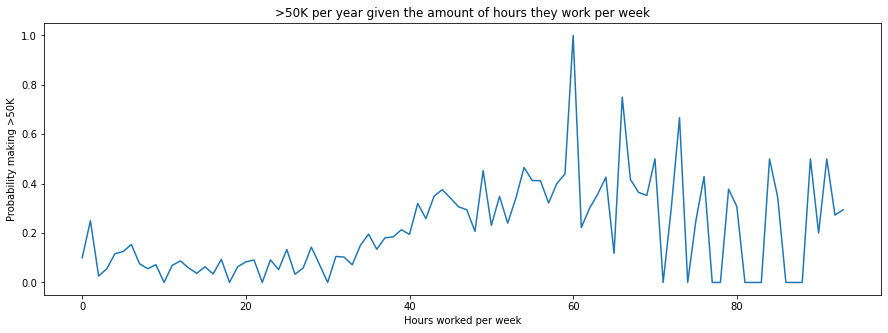

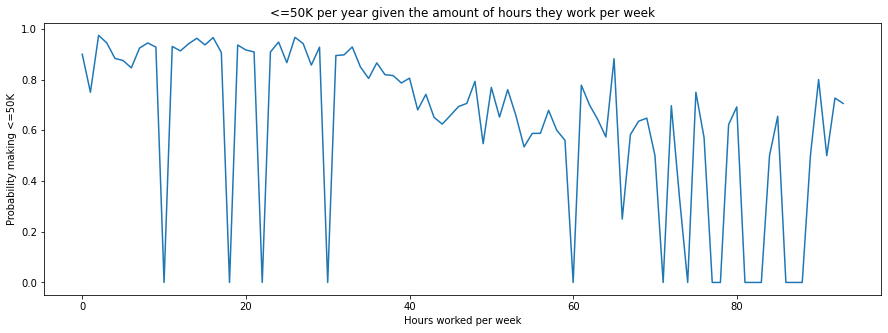

In [53]:
temp = adults[['hours-per-week', 'income']]
plot_greater_intersection = temp[temp['income'] == '>50K'].groupby(by='hours-per-week').count().reset_index()
plot_greater_bottom = temp.groupby(by='hours-per-week').count().reset_index()
top_index = [i[1]['hours-per-week'] for i in plot_greater_intersection.iterrows()]
bottom_index = [i[1]['hours-per-week'] for i in plot_greater_bottom.iterrows()]
test1 = set(top_index)
test2 = set(bottom_index)
tmp = test2.difference(test1)
insert_indices = sorted(tmp)
top = [(i[1]['hours-per-week'],i[1]['income']) for i in plot_greater_intersection.iterrows()]
bottom = [i[1]['income'] for i in plot_greater_bottom.iterrows()]
for i in insert_indices:
    top.append((i,0))

top.sort(key= lambda x: x[0])
top = [i[1] for i in top]

y_values = [i / j for i,j in zip(top,bottom)]
x_values = [i for i in range(0,94)]

plt.plot(x_values,y_values)
plt.title('>50K per year given the amount of hours they work per week')
plt.xlabel('Hours worked per week')
plt.ylabel('Probability making >50K')
plt.show()

plot_lesser_intersection = temp[temp['income'] == '<=50K'].groupby(by='hours-per-week').count().reset_index()
plot_lesser_bottom = temp.groupby(by='hours-per-week').count().reset_index()
top_index = [i[1]['hours-per-week'] for i in plot_lesser_intersection.iterrows()]
bottom_index = [i[1]['hours-per-week'] for i in plot_lesser_bottom.iterrows()]
test1 = set(top_index)
test2 = set(bottom_index)
tmp = test2.difference(test1)
insert_indices = sorted(tmp)
top = [(i[1]['hours-per-week'],i[1]['income']) for i in plot_lesser_intersection.iterrows()]
bottom = [i[1]['income'] for i in plot_lesser_bottom.iterrows()]
for i in insert_indices:
    top.append((i,0))

top.sort(key= lambda x: x[0])
top = [i[1] for i in top]

y_values = [i / j if i < j else 0 for i,j in zip(top,bottom)]
x_values = [i for i in range(0,94)]
plt.plot(x_values,y_values)
plt.title('<=50K per year given the amount of hours they work per week')
plt.xlabel('Hours worked per week')
plt.ylabel('Probability making <=50K')
plt.show()